<a href="https://colab.research.google.com/github/addo561/Pytorch-book-chapters/blob/main/chaptar_2_of_book_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
class perceptron:
  def __init__(self,lr=0.01,n_ter=50):
    self.lr = lr
    self.n_ter = n_ter


  def fit(self,X,y):
    samples,features = X.shape

    gen = np.random.RandomState(1)


    self.w = gen.normal(loc=0.0,scale=0.01,size=features)
    self.b = float(0.)
    self.errors = []

    for _ in range(self.n_ter):
      errors = 0
      for x,target in zip(X,y):
        update = self.lr * (target - self.predict(x))
        self.w += update * x
        self.b += update
        errors += int(update != 0.0)
      self.errors.append(errors)
    return self

  def net_input(self,X):
    return np.dot(X,self.w) + self.b


  def  predict(self,X):
    return np.where(self.net_input(X) >= 0.0,1,0)

In [ ]:
import pandas as pd

s= 'https://archive.ics.uci.edu/ml/'\
 'machine-learning-databases/iris/iris.data'
df = pd.read_csv(s,header=None)
df.tail()


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
X = df.iloc[0:100,[0,2]].values

In [ ]:
X[:5]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4]])

In [ ]:
y= df.iloc[0:100,4].values

In [ ]:
y[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [ ]:
y = np.where(y =='iris-setosa',0,1)

In [ ]:
y[:5]

array([1, 1, 1, 1, 1])

In [ ]:
p= perceptron(lr=0.1,n_ter=10)
p.fit(X,y)

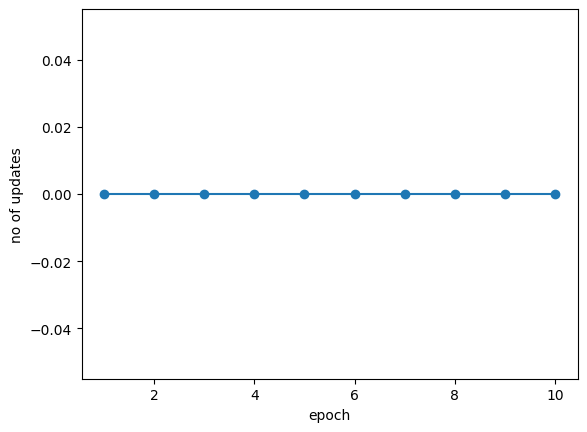

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(p.errors) + 1),p.errors,marker='o')
plt.xlabel('epoch')
plt.ylabel('no of updates')
plt.show()

In [ ]:
X_test = df.iloc[101:150,[0,2]]
y_test = df.iloc[101:150,4]
pred = p.predict(X_test)


In [ ]:
y_test=np.where(y_test=='iris-setosa',0,1)

In [ ]:
acc = np.sum(y_test==pred)/len(y_test)
acc

1.0

In [ ]:
class AdalineGD:
  def __init__(self,lr=0.01,n_ter=50):
    self.lr = lr
    self.n_ter = n_ter


  def fit(self,X,y):
    samples,features = X.shape

    gen = np.random.RandomState(1)


    self.w = gen.normal(loc=0.0,scale=0.01,size=features)
    self.b = float(0.)
    self.losses = []

    for _ in range(self.n_ter):
      net_input = self.net_input(X)
      output = self.activation_func(net_input)
      errors = (y - output)
      self.w += self.lr * 2.0 * X.T.dot(errors) / X.shape[0]
      self.b += self.lr * 2.0 * errors.mean()
      loss = (errors**2).mean()
      self.losses.append(loss)
    return self

  def net_input(self,X):
    return np.dot(X,self.w) + self.b

  def activation_func(self,X):
    return X

  def  predict(self,X):
    return np.where(self.activation_func(self.net_input(X)) >= 0.5,1,0)

In [ ]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [ ]:
X_std[:5]

array([[-0.5810659 , -1.01435952],
       [-0.89430898, -1.01435952],
       [-1.20755205, -1.08374115],
       [-1.36417359, -0.94497788],
       [-0.73768744, -1.01435952]])

In [ ]:
ada = AdalineGD(n_ter=20,lr=0.1)
ada.fit(X_std,y)

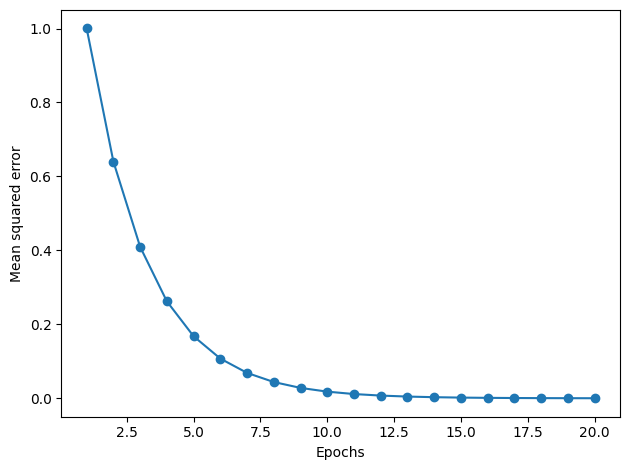

In [ ]:
plt.plot(range(1, len(ada.losses) + 1),
... ada.losses, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()

In [ ]:
class AdalineSGD:
  def __init__(self,lr,n_iter,shuffle=True,random_state=None):
    self.lr=lr
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_state = random_state

  def fit(self,X,y):
    self._initialize_weights(X.shape[1])
    self.losses_ = []
    for i in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)
      losses = []
      for xi, target in zip(X, y):
          losses.append(self._update_weights(xi, target))
      avg_loss = np.mean(losses)
      self.losses_.append(avg_loss)
    return self

  def partial_fit(self,X,y):
    if not self.w_initialized:
        self._initialize_weights(X.shape[1])
    if y.ravel().shape[0] > 1:
        for xi, target in zip(X, y):
            self._update_weights(xi, target)
    else:
        self._update_weights(X, y)
    return self

  def _initialize_weights(self, m):
      """Initialize weights to small random numbers"""
      self.rgen = np.random.RandomState(self.random_state)
      self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
            size=m)
      self.b_ = np.float_(0.)
      self.w_initialized = True


  def _update_weights(self, xi, target):
    """Apply Adaline learning rule to update the weights"""
    output = self.activation(self.net_input(xi))
    error = (target - output)
    self.w_ += self.lr * 2.0 * xi * (error)
    self.b_ += self.lr * 2.0 * error
    loss = error**2
    return loss

  def _shuffle(self, X, y):
    """Shuffle training data"""
    r = self.rgen.permutation(len(y))
    return X[r], y[r]

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_) + self.b_

  def activation(self, X):
      """Compute linear activation"""
      return X

  def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.activation(self.net_input(X))
            >= 0.5, 1, 0)

In [ ]:
ada_sgd = AdalineSGD(n_iter=15, lr=0.01, random_state=1)

In [ ]:
ada_sgd.fit(X_std,y)

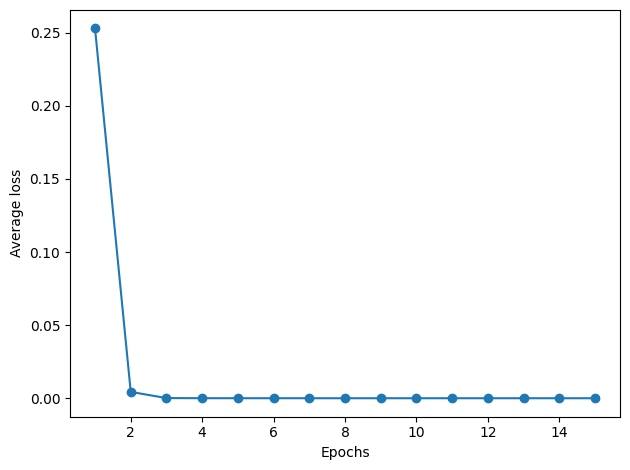

In [ ]:
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_,
marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()